In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df=pd.read_excel('/Users/anuragsingh/Downloads/Data-set 4-1.xlsx')

In [16]:

print(df.head())

         Date        ACCNO         Cust State  Cust Pin  DPD
0  08-03-2024  92262X8X94X  ARUNACHAL PRADESH    791121   83
1  08-03-2024   9226X8267X  ARUNACHAL PRADESH    791113   21
2  08-03-2024  92262344427  ARUNACHAL PRADESH    791112   30
3  08-03-2024    9226X9822  ARUNACHAL PRADESH    791113   50
4  08-03-2024     92269244  ARUNACHAL PRADESH    791121   25


In [17]:
print(df.tail())

           Date        ACCNO      Cust State  Cust Pin  DPD
171  10-03-2024     9236383X  MADHYA PRADESH    462047   31
172  10-03-2024  92363762997  MADHYA PRADESH    462030   75
173  10-03-2024   9223284668  MADHYA PRADESH    452001   66
174  10-03-2024  92239964338  MADHYA PRADESH    473443   74
175  10-03-2024  92263622973         GUJARAT    396191   18


In [18]:
df.rename(columns={'Cust State': 'Cust_State'}, inplace=True)

In [19]:
total_entries = len(df)
avg_dpd = df['DPD'].mean()
max_dpd = df['DPD'].max()
min_dpd = df['DPD'].min()

In [20]:
# Group by 'Cust_State' to get total customers and average DPD per state
state_summary_df = df.groupby('Cust_State').agg({
    'ACCNO': 'count',  # Total customers per state
    'DPD': 'mean',     # Average DPD per state
}).reset_index()

In [21]:
# Extract necessary data for charts
states = state_summary_df['Cust_State'].tolist()
dpd_values = state_summary_df['DPD'].tolist()
customer_counts = state_summary_df['ACCNO'].tolist()


In [22]:
# Summary for display
summary = {
    'total_entries': total_entries,
    'avg_dpd': avg_dpd,
    'max_dpd': max_dpd,
    'min_dpd': min_dpd,
    'state_summary': state_summary_df.to_dict(orient='records'),
    'states': states,  # List of states for chart
    'dpd_values': dpd_values,  # List of DPD values for chart
    'customer_counts': customer_counts  # List of customer counts for chart
}


Total Entries: 176
Average DPD: 46.17
Maximum DPD: 90
Minimum DPD: 1

State-wise Summary:
           Cust_State  ACCNO        DPD
0   ARUNACHAL PRADESH      8  54.625000
1               ASSAM      4  22.500000
2               BIHAR      1  16.000000
3       CHHATTISGARH       1  33.000000
4             GUJARAT      1  18.000000
5           JHARKHAND     11  48.818182
6      MADHYA PRADESH     18  55.166667
7         MAHARASHTRA      1  41.000000
8              ODISHA     10  33.100000
9             TRIPURA     11  38.636364
10        WEST BENGAL    110  47.318182


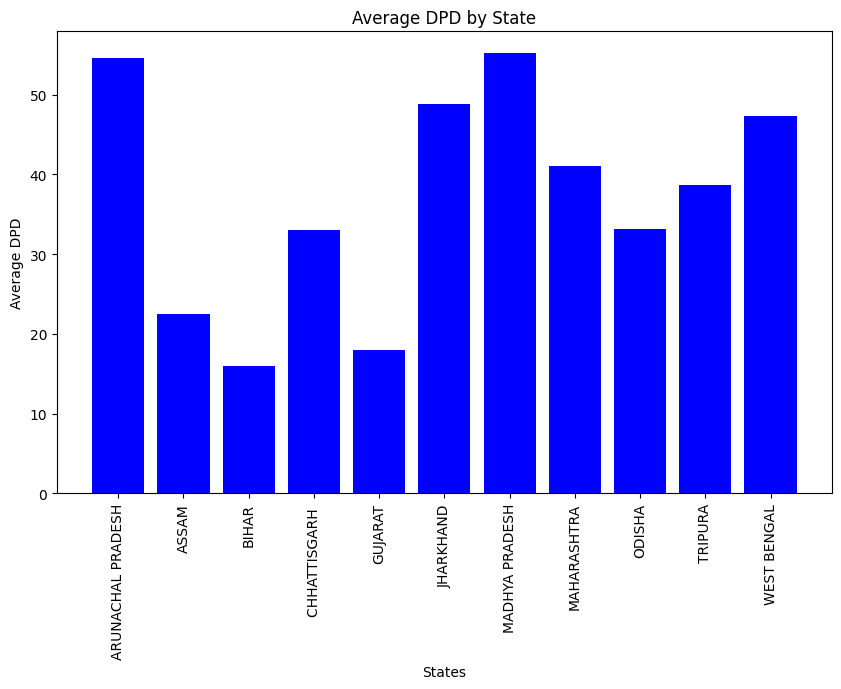

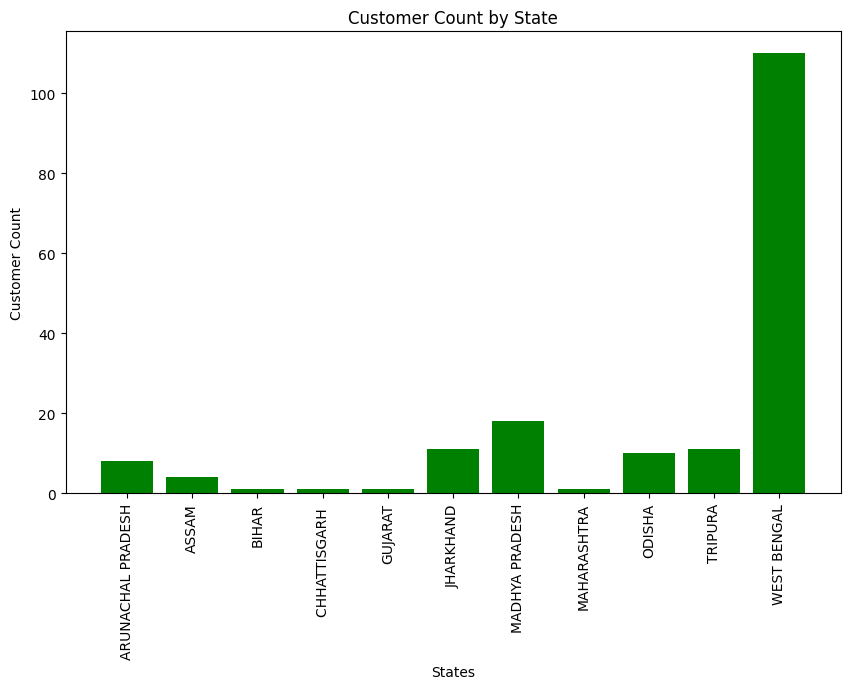

In [23]:
# Print basic analysis
print(f"Total Entries: {total_entries}")
print(f"Average DPD: {avg_dpd:.2f}")
print(f"Maximum DPD: {max_dpd}")
print(f"Minimum DPD: {min_dpd}")

# Display state-wise summary
print("\nState-wise Summary:")
print(state_summary_df)

# Plotting DPD values per state
plt.figure(figsize=(10,6))
plt.bar(states, dpd_values, color='blue')
plt.title('Average DPD by State')
plt.xlabel('States')
plt.ylabel('Average DPD')
plt.xticks(rotation=90)
plt.show()

# Plotting Customer counts per state
plt.figure(figsize=(10,6))
plt.bar(states, customer_counts, color='green')
plt.title('Customer Count by State')
plt.xlabel('States')
plt.ylabel('Customer Count')
plt.xticks(rotation=90)
plt.show()